here a reference for markov chains : http://www.statslab.cam.ac.uk/~rrw1/markov/M.pdf

the dynamics of a dipolar trap can be described by a markov chain

the differential equation is

$$ \frac{d\bar{v}}{dt} = \hat{P} \bar{v}$$

where $\bar{v}$ is the probability vector and $\hat{P}$ is the markov probability matrix.

the site $i$ of the chain corrisponds to the state with $i$ atoms in the dipolar trap.

in this case we consider that the collisions between 2 trapped atoms cause the loss of both, we get the following matrix.

$$ \hat{P} =
    \begin{pmatrix}
    -p & p & 0 & 0  & \dots & 0 \\
    p_{10} & q_1 & p  & 0 & \dots & 0 \\
    p_{20} & p_{21} & q_2 & p  & \dots & 0 \\
    0 & p_{31} & p_{32} & q_3  & \dots & 0 \\
    \vdots & \vdots & \vdots & \vdots & \ddots & p \\
    0 & 0 & 0 & p_{i,i-2} & p_{i,i-1} &  q_i  \\
    \end{pmatrix}
$$

with 
- $p = R$ is the loading probability
- $p_{i, i-1} = - i \gamma $ is the one-body loss probability 
- $p_{i, i-2} = - \beta i(i-1) $ is the two-body loss probability 
- $q_i = - p_{i, i-2} - p_{i, i-1} - p $


the initial condition is $v_0 = 1 \ \ ; \ \ v_i = 0 \ \ \forall i \neq 0$ 

In [2]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

class markov_chain_FORT:
    def __init__(self, R, gamma, beta, truncation_size) -> None:
        self.R = R
        self.gamma = gamma
        self.beta = beta
        self.truncation_size = truncation_size
        self.transition_matrix = self.get_transition_matrix()
        pass
    
    def get_transition_matrix(self):
        P = np.zeros([self.truncation_size, self.truncation_size])
        P[0, 0] = - self.R
        P[0, 1] = self.R
        P[1, 0] = self.gamma
        P[1, 1] = - self.R - self.gamma
        P[1, 2] = self.R
        for i in range(2, self.truncation_size-1):
            p_i_1 = i*self.gamma
            p_i_2 = self.beta*(i-1)*i
            P[i, i+1] = self.R
            P[i, i] = - self.R - p_i_1 - p_i_2
            P[i, i-1] = p_i_1
            P[i, i-2] = p_i_2
        P[self.truncation_size-1, self.truncation_size-1] = - (self.truncation_size-1)*(self.gamma+self.beta*((self.truncation_size-1)-1)) - self.R
        P[self.truncation_size-1, self.truncation_size-2] = (self.truncation_size-1)*self.gamma
        P[self.truncation_size-1, self.truncation_size-3] = (self.truncation_size-1)*self.beta*((self.truncation_size-1)-1)
        return P
    
    def function_(self, t, v):
        return np.dot(v, self.transition_matrix)

    def evolve(self, v0, time, steps):
        self.evo = solve_ivp(self.function_, t_span=(0,time), y0=v0, t_eval=np.linspace(0, time, steps))
        return

    def show_matrix(self):
        from sympy import Matrix
        return Matrix(self.transition_matrix)
    
    def plot_mandel_Q(self):
        means_ = []
        vars_ = []
        Qs_ = []
        for i in range(len(self.evo.y[0])):
            mean_, var_, mandel_Q_ = mean_var_mandel_Q(self.evo.y[:,i])
            means_.append(mean_)
            vars_.append(var_)
            Qs_.append(mandel_Q_)
        plt.plot(Qs_)
        plt.show()
        return

def mean_var_mandel_Q(probability_vec):
    mean = 0
    men_2 = 0
    for i in range(len(probability_vec)):
        mean += i*probability_vec[i]
        men_2 += i**2*probability_vec[i]
    variance = men_2 - mean**2
    Q = variance/mean - 1
    return mean, variance, Q


In [4]:
mag = 3
trunc = 10
time = 1000
steps = 10000

v0 = np.zeros(trunc)
v0[0] = 1

R = 10 * 10**-mag
gamma = 0.1 * 10**-mag
beta = 1 * 10**-mag

print(R, gamma, beta)

mcF = markov_chain_FORT(R, gamma, beta, trunc)
mcF.evolve(v0, time, steps)

mcF.show_matrix()

0.01 0.0001 0.001


Matrix([
[ -0.01,    0.01,       0,       0,       0,       0,       0,       0,       0,       0],
[0.0001, -0.0101,    0.01,       0,       0,       0,       0,       0,       0,       0],
[ 0.002,  0.0002, -0.0122,    0.01,       0,       0,       0,       0,       0,       0],
[     0,   0.006,  0.0003, -0.0163,    0.01,       0,       0,       0,       0,       0],
[     0,       0,   0.012,  0.0004, -0.0224,    0.01,       0,       0,       0,       0],
[     0,       0,       0,    0.02,  0.0005, -0.0305,    0.01,       0,       0,       0],
[     0,       0,       0,       0,    0.03,  0.0006, -0.0406,    0.01,       0,       0],
[     0,       0,       0,       0,       0,   0.042,  0.0007, -0.0527,    0.01,       0],
[     0,       0,       0,       0,       0,       0,   0.056,  0.0008, -0.0668,    0.01],
[     0,       0,       0,       0,       0,       0,       0,   0.072,  0.0009, -0.0829]])

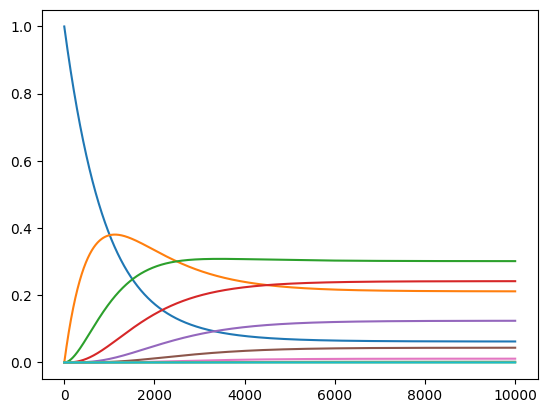

In [5]:
for i in range(10):
    plt.plot(mcF.evo.y[i], label="%d"%i)
#plt.plot(evo.y[29], label="%d"%29)
#plt.legend()
plt.show()

/var/folders/gq/pyfb45qx3wg52k7kygqcjy840000gn/T/ipykernel_29293/887358248.py:64: RuntimeWarning: invalid value encountered in double_scalars
  Q = variance/mean - 1


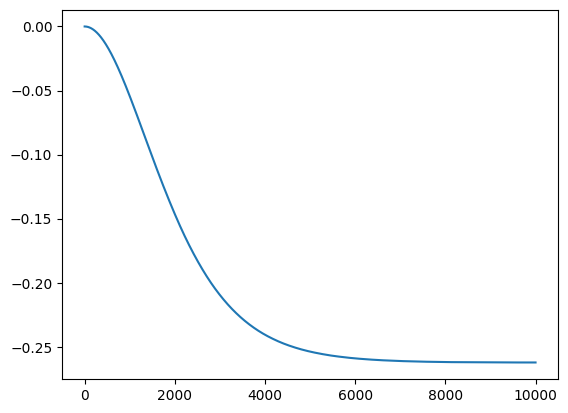

In [6]:
mcF.plot_mandel_Q()

In [7]:
mean_var_mandel_Q(mcF.evo.y[:,-1])

(2.3430752462176883, 1.7286200850350957, -0.2622430338822782)

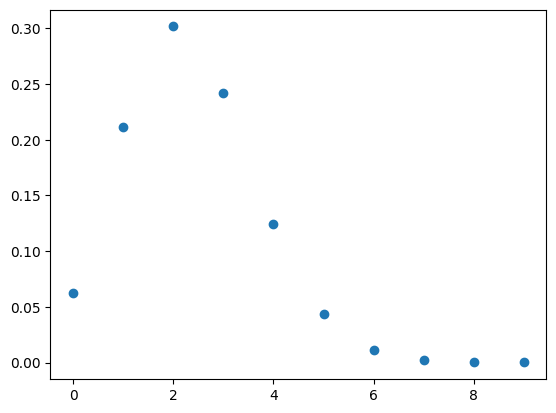

In [8]:
plt.plot(mcF.evo.y[:,-1], "o")
plt.show()